# TEST NOTEBOOK

In [42]:
from main import *
from utils import abs_path_from_filename

In [5]:
C0 = 299792458
FC = 77e9
LAMBDA = C0 / FC

Z_IDX = 13


In [41]:
volume, x_vec, y_vec, z_vec = import_volume(
    abs_path_from_filename("20221110-104101-918")
)

In [29]:
z_vec[1] - z_vec[0]

0.0037500000000000033

In [10]:

Nx = x_vec.size
Ny = y_vec.size

kx = (np.arange(-Nx / 2, Nx / 2 - 1)) / ((Nx - 1) * np.diff(x_vec[:2]))
ky = (np.arange(-Ny / 2, Ny / 2 - 1)) / ((Ny - 1) * np.diff(y_vec[:2]))

kx_n = kx * LAMBDA
ky_n = ky * LAMBDA

volume_max, kmax = compute_mip(volume)
volume_max_range = (np.min(np.abs(volume_max)), np.max(np.abs(volume_max)))
alpha_data = np.clip(
    1.8 * ((np.abs(volume_max) - volume_max_range[0]) / (volume_max_range[1] - volume_max_range[0])) - 0.25, 0, 1,
)


In [20]:
volume.shape

(129, 129, 33)

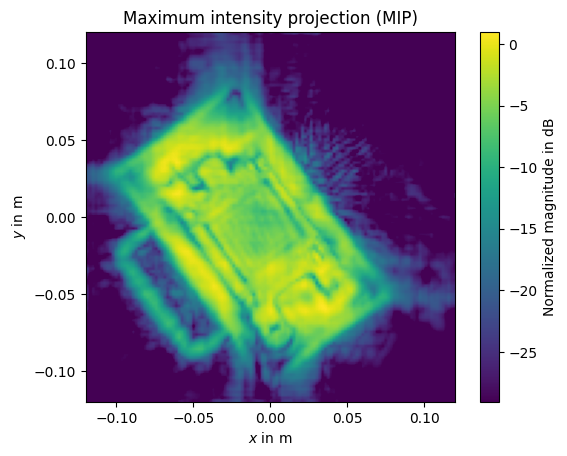

In [11]:

# 1 --> visualize magnitude of the MIP
image = 20 * np.log10(np.abs(volume_max / np.max(volume_max)))
display(
    image,
    img_title="Maximum intensity projection (MIP)",
    cmap_label="Normalized magnitude in dB",
    xvec=x_vec,
    yvec=y_vec,
    dynamic_range=30,
    xlabel="$x$ in m",
    ylabel="$y$ in m",
)


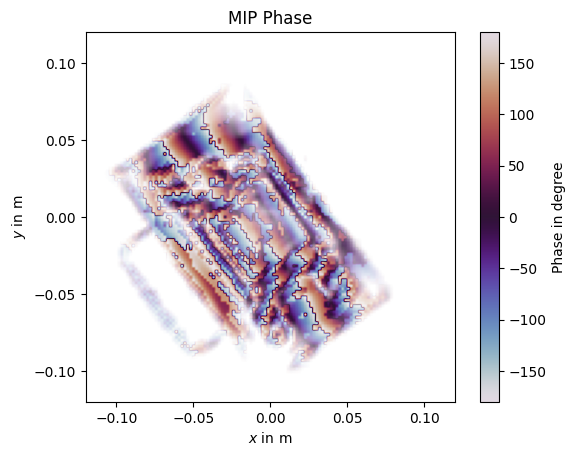

In [12]:

# 2 --> visualize phase of the MIP (opacity scaled by alpha_data)
_, volume_max_phase = complex2magphase(
    np.multiply(volume_max, np.exp(((1j * 2 * math.pi) / LAMBDA) * 2 * z_vec[kmax]))
)
display(
    180 / math.pi * volume_max_phase,
    color_map=plt.get_cmap("twilight"),
    img_title="MIP Phase",
    cmap_label="Phase in degree",
    alphadata=alpha_data,
    xvec=x_vec,
    yvec=y_vec,
    xlabel="$x$ in m",
    ylabel="$y$ in m",
)


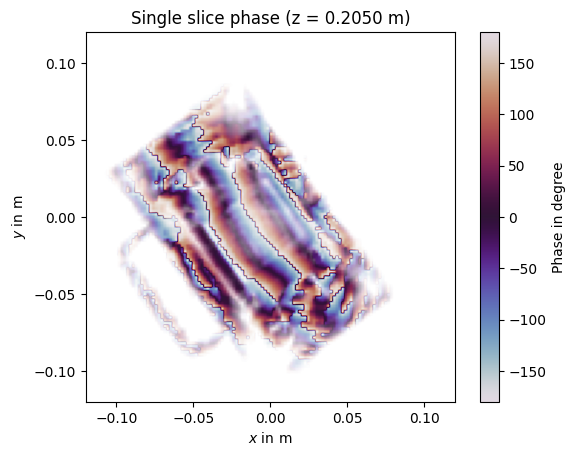

In [13]:

# 3 --> visualize the phase of a selected slice (opacity scaled by alpha_data)
_, V_slice_phase = complex2magphase(volume[:, :, Z_IDX - 1])
display(
    180 / math.pi * V_slice_phase,
    color_map=plt.get_cmap("twilight"),
    img_title=f"Single slice phase (z = {z_vec[Z_IDX - 1]:.4f} m)",
    cmap_label="Phase in degree",
    alphadata=alpha_data,
    xvec=x_vec,
    yvec=y_vec,
    xlabel="$x$ in m",
    ylabel="$y$ in m",
)


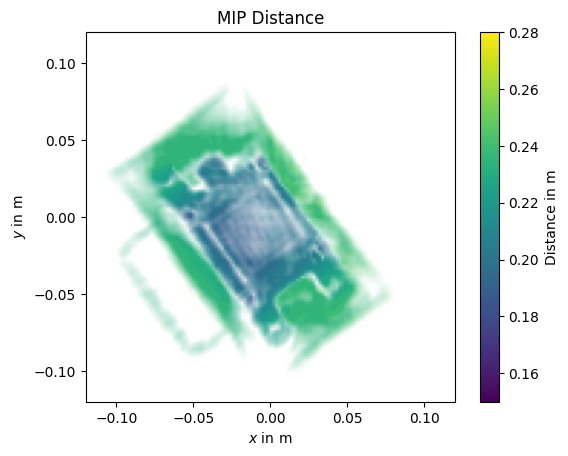

In [14]:

# 4 --> visualize the distance of the MIP (opacity scaled by alpha_data)
display(
    z_vec[kmax],
    img_title="MIP Distance",
    cmap_label="Distance in m",
    alphadata=alpha_data,
    xvec=x_vec,
    yvec=y_vec,
    clim=(0.15, 0.28),
    xlabel="$x$ in m",
    ylabel="$y$ in m",
)


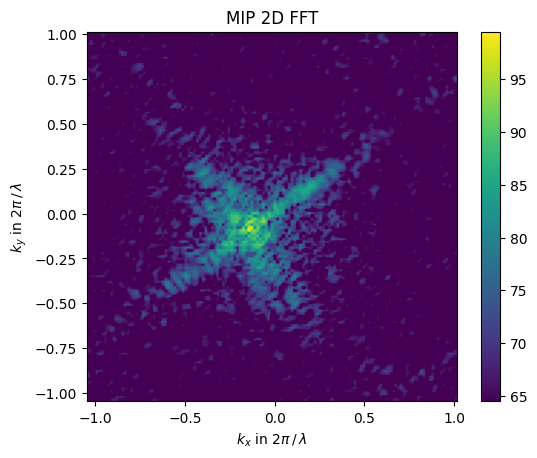

In [15]:

# 5 --> visualize the 2D FFT of the MIP
S_MIP = compute_fft(volume_max)
S_MIP_mag_dB = 20 * np.log10(np.abs(S_MIP))
display(
    S_MIP_mag_dB,
    img_title="MIP 2D FFT",
    dynamic_range=35,
    xvec=kx_n,
    yvec=ky_n,
    xlabel="$k_x$ in $2\\pi \\,/\\, \\lambda$",
    ylabel="$k_y$ in $2\\pi \\,/\\, \\lambda$",
)


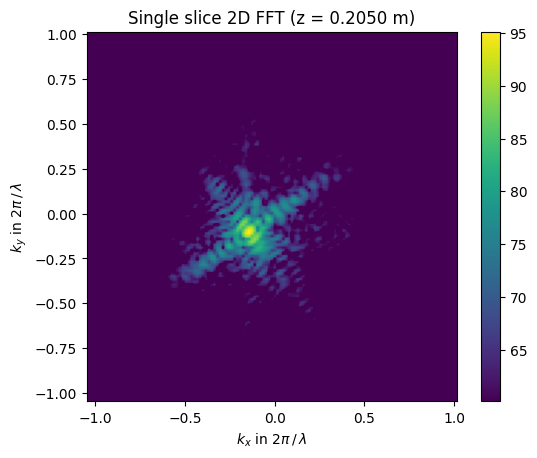

In [16]:

# 6 --> visualize the 2D FFT of a single slice
S_slice = compute_fft(volume[:, :, Z_IDX - 1])
S_slice_mag_dB = 20 * np.log10(np.abs(S_slice))
display(
    S_slice_mag_dB,
    img_title=f"Single slice 2D FFT (z = {z_vec[Z_IDX - 1]:.4f} m)",
    dynamic_range=35,
    xvec=kx_n,
    yvec=ky_n,
    xlabel="$k_x$ in $2\\pi \\,/\\, \\lambda$",
    ylabel="$k_y$ in $2\\pi \\,/\\, \\lambda$",
)